In [11]:
import pickle
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.single_cell as single_cell
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
from itertools import combinations


def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))


In [12]:
only_subject_collection = sc.SpikeCollection.load_collection(r'pilot2/only_subjects/only_subjects_spike_collection/spike_collection.json')
only_subject_collection.analyze(timebin = 100, ignore_freq = 0.5, smoothing_window=None)

All set to analyze


# Parameter EDA

In [5]:
#NEEDS TO BE REDONE WITH SMOOTHING WINDOW UPDATES
            #offset included                     offset excluded
# 3, 5, -2 =      76                                   84
# 1 , 5, -2 =     84                                   76
# 2, 5, -2 =      82                                   80                               
# 2, 4, 0 =       82                                   
# 3, 4 , -1 =     65                                   73
# 2, 4, -1 =      71                                   82
# 3, 4, 0 =       74
# 3, 3, 0 =       70
# 2, 3, 0 =       69
# 2, 4, 1 =       69

In [10]:
event_length = 2.5
baseline_window = 2
offset = 0
print(single_cell.fisher_exact_wilcoxon(only_subject_collection, 'novel', 'cagemate', event_length = event_length, baseline_window=baseline_window,offset= offset, event3 = None))
single_cell.fisher_exact_wilcoxon(only_subject_collection, 'novel', 'familiar', event_length = event_length, baseline_window=baseline_window,offset= offset, event3 = None)

Wilcoxon can't be done on 22_FCN_merged.rec cagemate, because <6 samples
(np.float64(1.8067632850241546), np.float64(0.217429507119157),           Significant  Non-Significant
novel              17              138
cagemate            9              132)
Wilcoxon can't be done on 21_NCF_merged.rec familiar, because <6 samples
Wilcoxon can't be done on 32_NFC_merged.rec familiar, because <6 samples


(np.float64(1.201086956521739),
 np.float64(0.6973630817154637),
           Significant  Non-Significant
 novel              17              138
 familiar           12              117)

# Grouping cells for pie chart

needs to be checked to see whether if a neuron has one Nan (since wilcoxon update from tyler does compute P value for copmarisons with less than 6 of an event type), whether that neuron is thrown out completely or is listed as insignificant for the Nan comparisons if it can be computed for some of the comparisons. 

also you need to think about which way makes more sense to do

In [53]:
event_length = 2.5
baseline_window = 2
offset = 0
events = ['cagemate', 'novel', 'familiar']
prewindow_merged = single_cell.wilcoxon_collection(only_subject_collection, event=events[0], event_length=event_length, baseline_window=baseline_window, offset=offset, exclude_offset=True, plot=False)
baseline_merged = single_cell.wilcoxon_event1v2_collection(only_subject_collection, events[0], 'baseline', pre_window = baseline_window, event_length = event_length, plot=False)

# Merge remaining events with suffixes
for i, event in enumerate(events[1:], 1):
    suffix = f"_{event}"
    prewindow_results = single_cell.wilcoxon_collection(only_subject_collection, event, event_length, baseline_window, offset, plot = False)
    baseline_results = single_cell.wilcoxon_event1v2_collection(only_subject_collection, event, 'baseline', pre_window = baseline_window, event_length = event_length, plot=False)
    baseline_merged = pd.merge(baseline_merged, baseline_results, on=['Recording', 'Subject', 'original unit id'], suffixes=('', suffix))
    prewindow_merged = pd.merge(prewindow_merged, prewindow_results, on=['Recording', 'Subject', 'original unit id'], suffixes=('', suffix))

baseline_merged


Wilcoxon can't be done on 22_FCN_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 22_FCN_merged.rec because <6 samples for either cagemate or baseline
Wilcoxon can't be done on 21_NCF_merged.rec familiar, because <6 samples
Wilcoxon can't be done on 32_NFC_merged.rec familiar, because <6 samples
Wilcoxon can't be done on 21_NCF_merged.rec because <6 samples for either familiar or baseline
Wilcoxon can't be done on 32_NFC_merged.rec because <6 samples for either familiar or baseline


,Event,original unit id,Wilcoxon Stat,p value,Recording,Subject,event1 vs event2,Event_novel,Wilcoxon Stat_novel,p value_novel,event1 vs event2_novel,Event_familiar,Wilcoxon Stat_familiar,p value_familiar,event1 vs event2_familiar
0,cagemate vs baseline (2.5s),116,-2.775638,0.005509,11_CNF_merged.rec,1.1,decreases,novel vs baseline (2.5s),-1.382147,0.166926,not significant,familiar vs baseline (2.5s),-3.678971,0.000234,decreases
1,cagemate vs baseline (2.5s),19,-3.114524,0.001842,11_CNF_merged.rec,1.1,decreases,novel vs baseline (2.5s),-3.603456,0.000314,decreases,familiar vs baseline (2.5s),-3.128573,0.001757,decreases
2,cagemate vs baseline (2.5s),36,2.420615,0.015494,11_CNF_merged.rec,1.1,increases,novel vs baseline (2.5s),3.099959,0.001935,increases,familiar vs baseline (2.5s),2.732674,0.006282,increases
3,cagemate vs baseline (2.5s),40,-1.186101,0.235582,11_CNF_merged.rec,1.1,not significant,novel vs baseline (2.5s),-0.740436,0.459035,not significant,familiar vs baseline (2.5s),-1.699472,0.089230,not significant
4,cagemate vs baseline (2.5s),42,-3.937533,0.000082,11_CNF_merged.rec,1.1,decreases,novel vs baseline (2.5s),-1.461127,0.143981,not significant,familiar vs baseline (2.5s),-2.896827,0.003770,decreases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,cagemate vs baseline (2.5s),26,1.925244,0.054199,44_FCN_merged.rec,4.4,not significant,novel vs baseline (2.5s),-0.283709,0.776634,not significant,familiar vs baseline (2.5s),2.069637,0.038486,increases
111,cagemate vs baseline (2.5s),28,1.283496,0.199318,44_FCN_merged.rec,4.4,not significant,novel vs baseline (2.5s),2.374192,0.017587,increases,familiar vs baseline (2.5s),3.321046,0.000897,increases
112,cagemate vs baseline (2.5s),29,3.000172,0.002698,44_FCN_merged.rec,4.4,increases,novel vs baseline (2.5s),2.284600,0.022336,increases,familiar vs baseline (2.5s),3.353133,0.000799,increases
113,cagemate vs baseline (2.5s),4,0.705923,0.480236,44_FCN_merged.rec,4.4,not significant,novel vs baseline (2.5s),0.657009,0.511175,not significant,familiar vs baseline (2.5s),0.577573,0.563552,not significant


In [55]:
comparisons = ['familiar', 'cagemate', 'novel']
base_columns = ['Subject', 'Recording', 'original unit id']

prewindow_master_df = prewindow_merged[base_columns].copy()
for comparison in comparisons:
    prewindow_master_df[f'{comparison} vs baseline'] = prewindow_merged[f'event1 vs event2_{comparison}' if comparison != 'cagemate' else 'event1 vs event2']


prewindow_master_df_trimmed = prewindow_master_df[['original unit id'] + [f'{comp} vs baseline' for comp in comparisons]]
prewindow_master_df_trimmed

,original unit id,familiar vs baseline,cagemate vs baseline,novel vs baseline
0,116,not significant,not significant,not significant
1,19,increases,increases,not significant
2,36,not significant,not significant,increases
3,40,not significant,not significant,not significant
4,42,not significant,increases,not significant
...,...,...,...,...
110,26,not significant,not significant,increases
111,28,not significant,not significant,not significant
112,29,not significant,not significant,increases
113,4,not significant,not significant,not significant


In [56]:
baseline_master_df = baseline_merged[base_columns].copy()
for comparison in comparisons:
    baseline_master_df[f'{comparison} vs baseline'] = baseline_merged[f'event1 vs event2_{comparison}' if comparison != 'cagemate' else 'event1 vs event2']


baseline_master_df_trimmed = baseline_master_df[['original unit id'] + [f'{comp} vs baseline' for comp in comparisons]]
baseline_master_df_trimmed

,original unit id,familiar vs baseline,cagemate vs baseline,novel vs baseline
0,116,decreases,decreases,not significant
1,19,decreases,decreases,decreases
2,36,increases,increases,increases
3,40,not significant,not significant,not significant
4,42,decreases,decreases,not significant
...,...,...,...,...
110,26,increases,not significant,not significant
111,28,increases,not significant,increases
112,29,increases,increases,increases
113,4,not significant,not significant,not significant


In [57]:
def group_cells(novel, cagemate, fam, acquisition=None):
    group = ''
    if (novel == 'increases') or (novel == 'decreases'):
        group = 'novel'
    if (cagemate == 'increases') or (cagemate == 'decreases'):
        group = group + 'cagemate' 
    if (fam == 'increases') or (fam == 'decreases'):
        group = group + 'fam'
    if acquisition is not None:
        if (acquisition == 'increases') or (acquisition == 'decreases'):
            group = group + 'acquisition'
    return group

prewindow_master_df['cell group'] = prewindow_master_df.apply(lambda row: group_cells(row['novel vs baseline'],
                                                                  row['cagemate vs baseline'],
                                                                  row['familiar vs baseline']), axis = 1)
results = prewindow_master_df.groupby('cell group').count()
results



,Subject,Recording,original unit id,familiar vs baseline,cagemate vs baseline,novel vs baseline
cell group,,,,,,
,84,84,84,84,84,84
cagemate,6,6,6,6,6,6
cagematefam,2,2,2,2,2,2
fam,9,9,9,9,9,9
novel,13,13,13,13,13,13
novelcagemate,1,1,1,1,1,1


In [58]:
baseline_master_df['cell group'] = baseline_master_df.apply(lambda row: group_cells(row['novel vs baseline'],
                                                                  row['cagemate vs baseline'],
                                                                  row['familiar vs baseline']), axis = 1)

In [59]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold' 

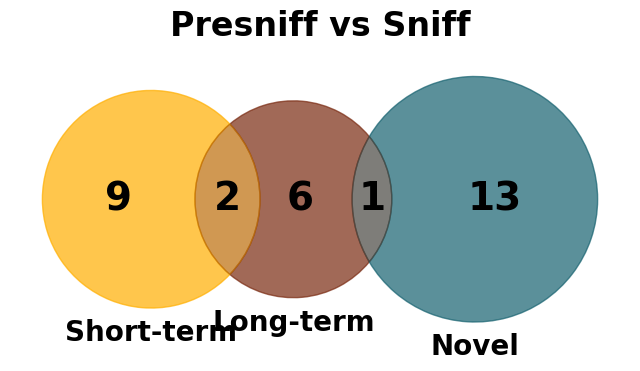

In [60]:
from matplotlib_venn import venn3
set1 = set(prewindow_master_df.index[prewindow_master_df['cell group'].str.contains('cagemate')])
set2 = set(prewindow_master_df.index[prewindow_master_df['cell group'].str.contains('fam')])
set3 = set(prewindow_master_df.index[prewindow_master_df['cell group'].str.contains('novel')])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Long-term', 'Short-term', 'Novel'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
#venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
#venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101'):# '011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Presniff vs Sniff', fontsize =24)
plt.show()

In [61]:
baseline_master_df

,Subject,Recording,original unit id,familiar vs baseline,cagemate vs baseline,novel vs baseline,cell group
0,1.1,11_CNF_merged.rec,116,decreases,decreases,not significant,cagematefam
1,1.1,11_CNF_merged.rec,19,decreases,decreases,decreases,novelcagematefam
2,1.1,11_CNF_merged.rec,36,increases,increases,increases,novelcagematefam
3,1.1,11_CNF_merged.rec,40,not significant,not significant,not significant,
4,1.1,11_CNF_merged.rec,42,decreases,decreases,not significant,cagematefam
...,...,...,...,...,...,...,...
110,4.4,44_FCN_merged.rec,26,increases,not significant,not significant,fam
111,4.4,44_FCN_merged.rec,28,increases,not significant,increases,novelfam
112,4.4,44_FCN_merged.rec,29,increases,increases,increases,novelcagematefam
113,4.4,44_FCN_merged.rec,4,not significant,not significant,not significant,


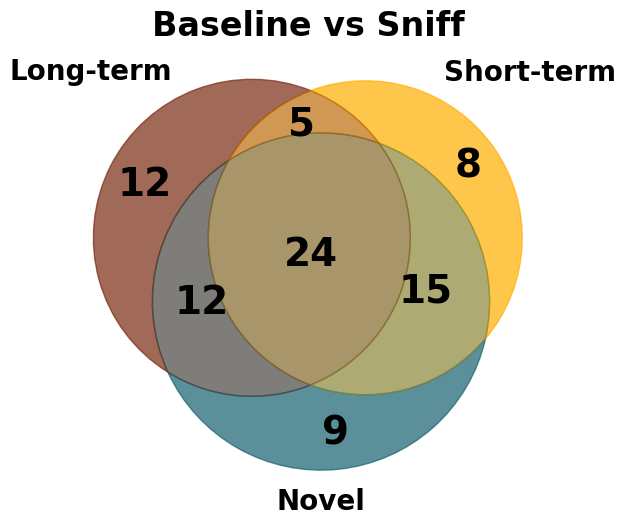

In [63]:
set1 = set(baseline_master_df.index[baseline_master_df['cell group'].str.contains('cagemate')])
set2 = set(baseline_master_df.index[baseline_master_df['cell group'].str.contains('fam')])
set3 = set(baseline_master_df.index[baseline_master_df['cell group'].str.contains('novel')])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Long-term', 'Short-term', 'Novel'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101','011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Baseline vs Sniff', fontsize = 24)
plt.show()

# Plotting

These are old example neurons, new ones will have to be found

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


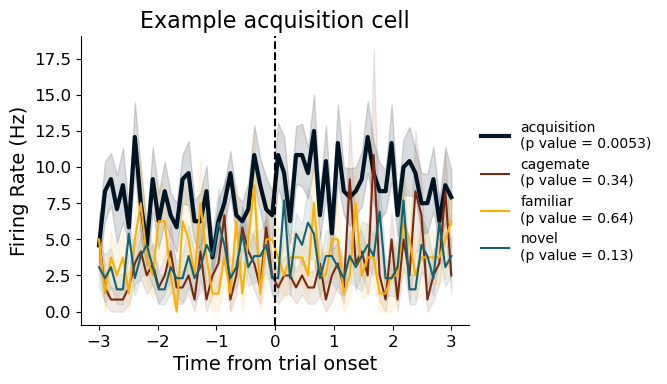

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


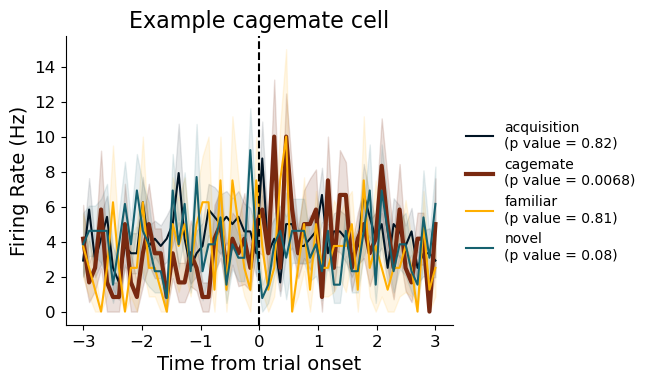

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


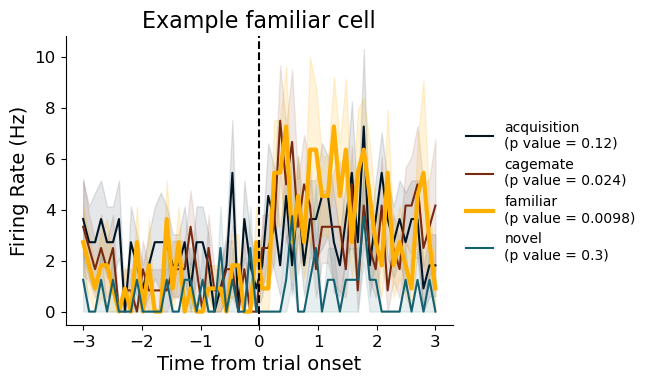

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


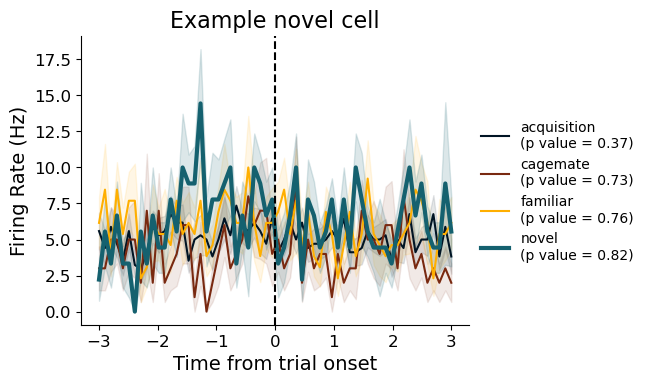

In [ ]:
color_dict = {'cagemate':hex_2_rgb('#792910'), 'novel':hex_2_rgb('#15616F'),
              'recall':hex_2_rgb('#FFAF00'), 'acquisition':hex_2_rgb('#001424') }
def wilcox_baseline_v_event_unit(
    recording_name, unit_id, events,
    equalize, baseline_window, offset, title, highlight, exclude_offset=False,
    
):
    """
    plots event triggered average firing rates for units with significant
    wilcoxon signed rank tests (p value <0.05) for event v baseline window.

    Args(4 total, 4 required):
        events: list of str, event types of which ehpys snippets happen during
        equalize: float, length (s) of events used by padding with post
            event time or trimming events all to equalize (s) long used
        baseline_window: int, default=0, seconds prior to start of event
        offset: int, adjusts end of baseline by offset(s) from onset of
            behavior such that offset=2 adds the first two seconds of event
            data into baseline while offest=-2 removes them from baseline
            averages

    Returns:
        none
    """
    plt.figure(figsize=(5, 3.75))
    recording = phase2_analysis.ephyscollection.get_by_name(recording_name)
    for event in events:
        if event == highlight:
            linewidth = 3
            alpha = .15
        else:
            linewidth = 1.5
            alpha = .1
        temp_master_df = phase2_analysis.wilcox_baseline_v_event_collection(
            event,
            equalize,
            baseline_window,
            offset,
            exclude_offset,
            plot=False,
            save=False)
        master_df = temp_master_df[(temp_master_df['Recording'] ==
                                    recording_name) & (
                                        temp_master_df['original unit id']
                                        == unit_id)]
        master_df = master_df.reset_index()
        unit_event_firing_rates = phase2_analysis.__get_unit_event_firing_rates__(
            recording,
            event,
            equalize,
            baseline_window,
            0)
        mean_arr = np.mean(unit_event_firing_rates[unit_id], axis=0)
        sem_arr = sem(unit_event_firing_rates[unit_id], axis=0)
        p_value = master_df["p value"].values[0]
        x = np.linspace(
            start=-baseline_window, stop=equalize, num=len(mean_arr)
        )
        title_p = "{:.2g}".format(p_value)
        if event != 'recall':
            plt.plot(x, mean_arr, c=color_dict[event], linewidth=linewidth, label = f'{event}\n(p value = {title_p})')
        else:
            plt.plot(x, mean_arr, c=color_dict[event], linewidth=linewidth, label = f'familiar\n(p value = {title_p})')
        plt.fill_between(
            x, mean_arr - sem_arr, mean_arr + sem_arr, alpha=alpha,
            color = color_dict[event])
    if offset != 0:
        plt.axvline(x=offset, color='r', linestyle='--')
    plt.axvline(x=0, color="k", linestyle="--")   
    plt.title(title, fontsize = 16)
    plt.legend(bbox_to_anchor = (1,.75), frameon = False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Time from trial onset', fontsize=14)
    plt.ylabel('Firing Rate (Hz)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
wilcox_baseline_v_event_unit('20230804_141009_1_merged.rec', 6, 
                            ['acquisition', 'cagemate', 'recall', 'novel'], 
                            3, 3, 0, 'Example acquisition cell',
                            'acquisition')
wilcox_baseline_v_event_unit('20230804_141009_1_merged.rec', 147, 
                             ['acquisition', 'cagemate', 'recall', 'novel'], 
                             3, 3, 0, 'Example cagemate cell',
                             'cagemate')
wilcox_baseline_v_event_unit('20230804_121600_1_merged.rec', 19,
                            ['acquisition', 'cagemate', 'recall', 'novel'],
                               3, 3, 0, 'Example familiar cell',
                               'recall')
wilcox_baseline_v_event_unit('20230803_141047_1_merged.rec', 50, 
                             ['acquisition', 'cagemate', 'recall', 'novel'],
                               3, 3, 0,'Example novel cell',
                               'novel')